In [39]:
import sys
import pickle
import seaborn as sns

sys.path.insert(1, '../')
from Prepare_Events_Functions import *
from Plot_events_functions import *

In [40]:
color_mapping_loading = {
    'F2': (0.0, 0.0, 1.0, 0.6),    # darkblue with 0.6 alpha
    'F1': (0.0, 0.6902, 1.0, 0.6), # deepskyblue with 0.6 alpha
    'C': (0.5, 0.5, 0.5, 0.6),     # grey with 0.6 alpha
    'B1': (0.8039, 0.0, 0.0, 0.6), # indianred with 0.6 alpha
    'B2': (0.5451, 0.0, 0.0, 0.6)}  # darkred with 0.6 alpha

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}
quintile_cats_loading = ['F2','F1', 'C', 'B1', 'B2']

present_future_lookup = {'bc005': 'Present','bc006': 'Present','bc007': 'Present','bc009': 'Present','bc010': 'Present',
                         'bc011': 'Present', 'bc012': 'Present','bc013': 'Present','bc015': 'Present','bc016': 'Present', 
                         'bc017': 'Present','bc018': 'Present',
                        'nimrod': 'NIMROD',
                        'bb189': 'Future', 'bb192': 'Future','bb195': 'Future','bb198': 'Future','bb201': 'Future',
                        'bb204': 'Future','bb208': 'Future','bb211': 'Future','bb216': 'Future','bb219': 'Future',
                        'bb222': 'Future', 'bb225': 'Future'}

ids = ['nimrod', 
       'bc005', 'bc006', 'bc007', 'bc009', 'bc010','bc011', 'bc012','bc013','bc015', 'bc016', 'bc017', 'bc018',
       'bb189','bb192', 'bb195', 'bb198', 'bb201', 'bb204','bb208' ,'bb211','bb216', 'bb219','bb222','bb225']

# Define the corresponding labels for each identifier
labels = [f'UKCP18_present ({id})' if present_future_lookup[id] == 'Present' else f'UKCP18_future ({id})' if present_future_lookup[id] == 'Future' else 'NIMROD' for id in ids]

# Read in data

In [11]:
with open("/nfs/a319/gy17m2a/PhD/ProcessedData/Profiles/All_30mins/dataframes.pkl", 'rb') as file:
    dataframes = pickle.load(file)  

### Create versions of dataframes dictionary, which only keep some of the events

In [25]:
dataframes_summer = {id: df[df["season"] == 'Summer'] for id, df in dataframes.items()}
dataframes_shortdurations = {id: df[df["duration"] < 6] for id, df in dataframes.items()}
dataframes_veryshortdurations = {id: df[df["duration"] < 3] for id, df in dataframes.items()}
dataframes_lessshortdurations = {id: df[df["duration"] < 10] for id, df in dataframes.items()}
dataframes_top10percent = {id: keep_top_x_percent(10,df ) for id, df in dataframes.items()}
dataframes_top1percent = {id: keep_top_x_percent(1,df ) for id, df in dataframes.items()}
dataframes_tophalfpercent = {id: keep_top_x_percent(0.5,df ) for id, df in dataframes.items()}
dataframes_top20percent = {id: keep_top_x_percent(20,df ) for id, df in dataframes.items()}

### Create one dataframe including data from all present/future ensemble members in one

In [13]:
present_ids = [id for id in ids if present_future_lookup.get(id) == 'Present']
present_dataframes = pd.concat([dataframes[id] for id in present_ids], ignore_index=True)
present_dataframes_top20percent= pd.concat([dataframes_top20percent[id] for id in present_ids], ignore_index=True)
present_dataframes_top10percent= pd.concat([dataframes_top10percent[id] for id in present_ids], ignore_index=True)
present_dataframes_top1percent= pd.concat([dataframes_top1percent[id] for id in present_ids], ignore_index=True)
present_dataframes_tophalfpercent= pd.concat([dataframes_tophalfpercent[id] for id in present_ids], ignore_index=True)

future_ids = [id for id in ids if present_future_lookup.get(id) == 'Future']
future_dataframes = pd.concat([dataframes[id] for id in future_ids], ignore_index=True)
future_dataframes_top20percent= pd.concat([dataframes_top20percent[id] for id in future_ids], ignore_index=True)
future_dataframes_top10percent= pd.concat([dataframes_top10percent[id] for id in future_ids], ignore_index=True)
future_dataframes_top1percent= pd.concat([dataframes_top1percent[id] for id in future_ids], ignore_index=True)
future_dataframes_tophalfpercent= pd.concat([dataframes_tophalfpercent[id] for id in future_ids], ignore_index=True)

### Create dataframes for plotting boxplots

In [28]:
combined_df_loading = prepare_combined_data(dataframes, 'Loading_profile_molly', ids, present_future_lookup)
combined_df_shortdurations_loading = prepare_combined_data(dataframes_shortdurations, 'Loading_profile_molly', ids,present_future_lookup)
combined_df_veryshortdurations_loading = prepare_combined_data(dataframes_veryshortdurations, 'Loading_profile_molly', ids, present_future_lookup)
combined_df_lessshortdurations_loading = prepare_combined_data(dataframes_lessshortdurations, 'Loading_profile_molly', ids, present_future_lookup)

combined_df_durations_notpersonalised = prepare_combined_data(dataframes, 'DurationRange_notpersonalised', ids, present_future_lookup)
combined_df_durations_personalised = prepare_combined_data(dataframes, 'DurationRange_personalised', ids, present_future_lookup)
combined_df_durations = prepare_combined_data(dataframes, 'duration', ids, present_future_lookup)

combined_df_loading_summer = prepare_combined_data(dataframes_summer, 'Loading_profile_molly', ids, present_future_lookup)

combined_df_loading_top20percent = prepare_combined_data(dataframes_top20percent, 'Loading_profile_molly', ids, present_future_lookup)
combined_df_loading_top10percent = prepare_combined_data(dataframes_top10percent, 'Loading_profile_molly', ids, present_future_lookup)
combined_df_loading_top1percent = prepare_combined_data(dataframes_top1percent, 'Loading_profile_molly', ids, present_future_lookup)
combined_df_loading_tophalfpercent = prepare_combined_data(dataframes_tophalfpercent, 'Loading_profile_molly', ids, present_future_lookup)

## Mosaic plot comparing loading

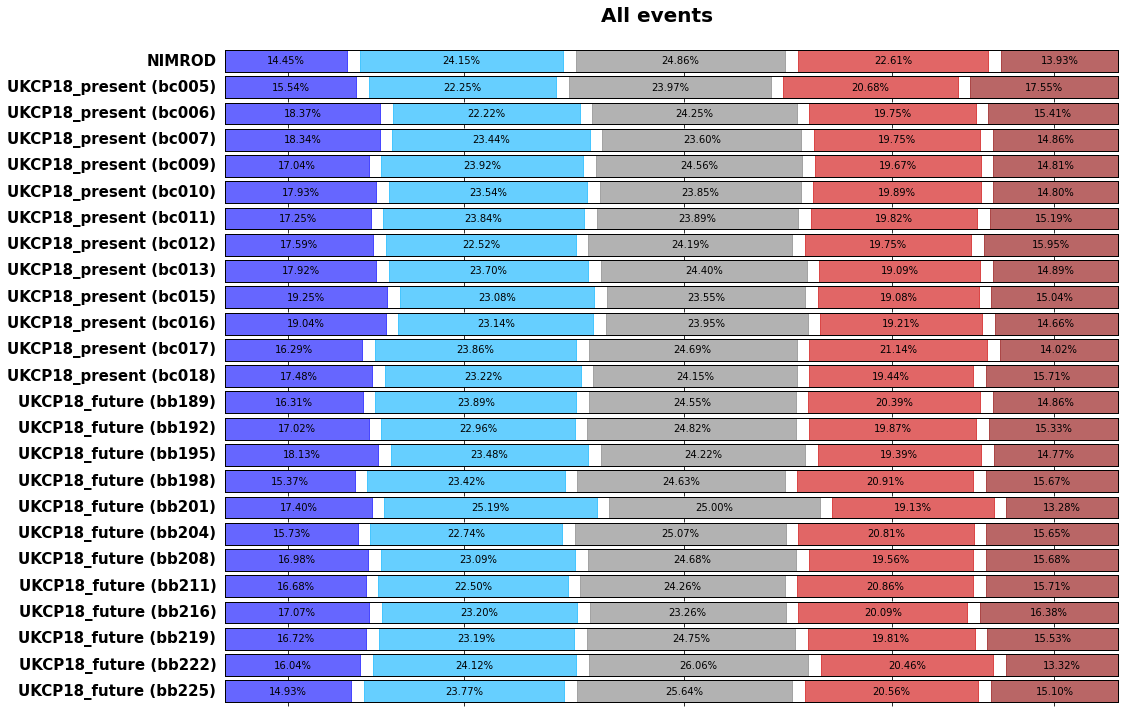

In [20]:
# Create the subplots
fig, axs = plt.subplots(nrows=len(ids), figsize=(16, 12), sharex=True)

# Loop over each id and create the plots
for i, id in enumerate(ids):
    create_single_variable_mosaic_plot_pctlabels(axs[i], dataframes[id], 'Loading_profile_steef', 
        quintile_cats_loading, color_mapping_loading,  labels[i])

# Add the overall title
fig.suptitle('All events', fontweight="bold", fontsize=20, y=0.93);

In [ ]:
## Comparing loading categories for different 

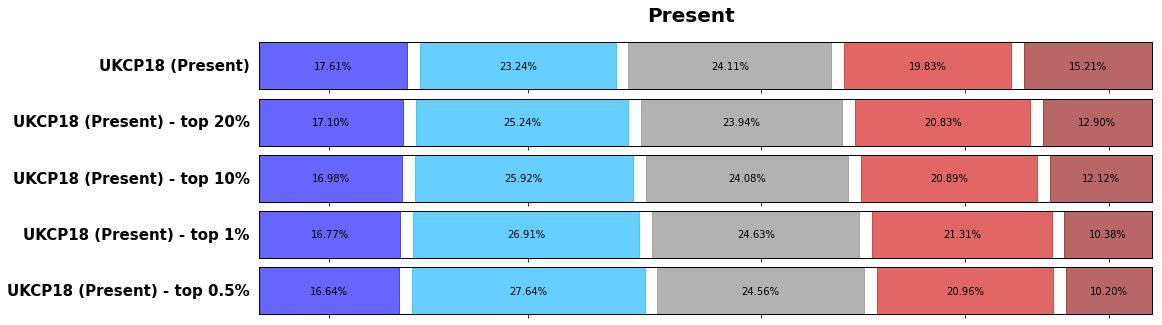

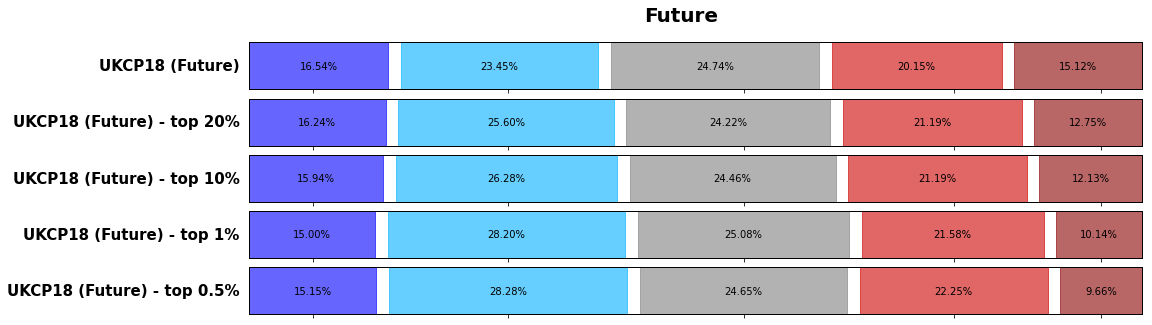

In [31]:
fig, axs = plt.subplots(nrows=5, figsize=(16, 5), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], present_dataframes, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Present)')
create_single_variable_mosaic_plot_pctlabels(axs[1], present_dataframes_top20percent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Present) - top 20%')
create_single_variable_mosaic_plot_pctlabels(axs[2], present_dataframes_top10percent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Present) - top 10%')
create_single_variable_mosaic_plot_pctlabels(axs[3], present_dataframes_top1percent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Present) - top 1%')
create_single_variable_mosaic_plot_pctlabels(axs[4], present_dataframes_tophalfpercent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Present) - top 0.5%')
fig.suptitle('Present', fontweight="bold", fontsize=20);

fig, axs = plt.subplots(nrows=5, figsize=(16, 5), sharex=True)
create_single_variable_mosaic_plot_pctlabels(axs[0], future_dataframes, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Future)')
create_single_variable_mosaic_plot_pctlabels(axs[1], future_dataframes_top20percent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Future) - top 20%')
create_single_variable_mosaic_plot_pctlabels(axs[2], future_dataframes_top10percent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Future) - top 10%')
create_single_variable_mosaic_plot_pctlabels(axs[3], future_dataframes_top1percent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Future) - top 1%')
create_single_variable_mosaic_plot_pctlabels(axs[4], future_dataframes_tophalfpercent, 'Loading_profile_steef', 
    quintile_cats_loading, color_mapping_loading,  'UKCP18 (Future) - top 0.5%')
fig.suptitle('Future', fontweight="bold", fontsize=20);

### Compare proportion of events in each loaading category between present and future
Cosider various subsets of events

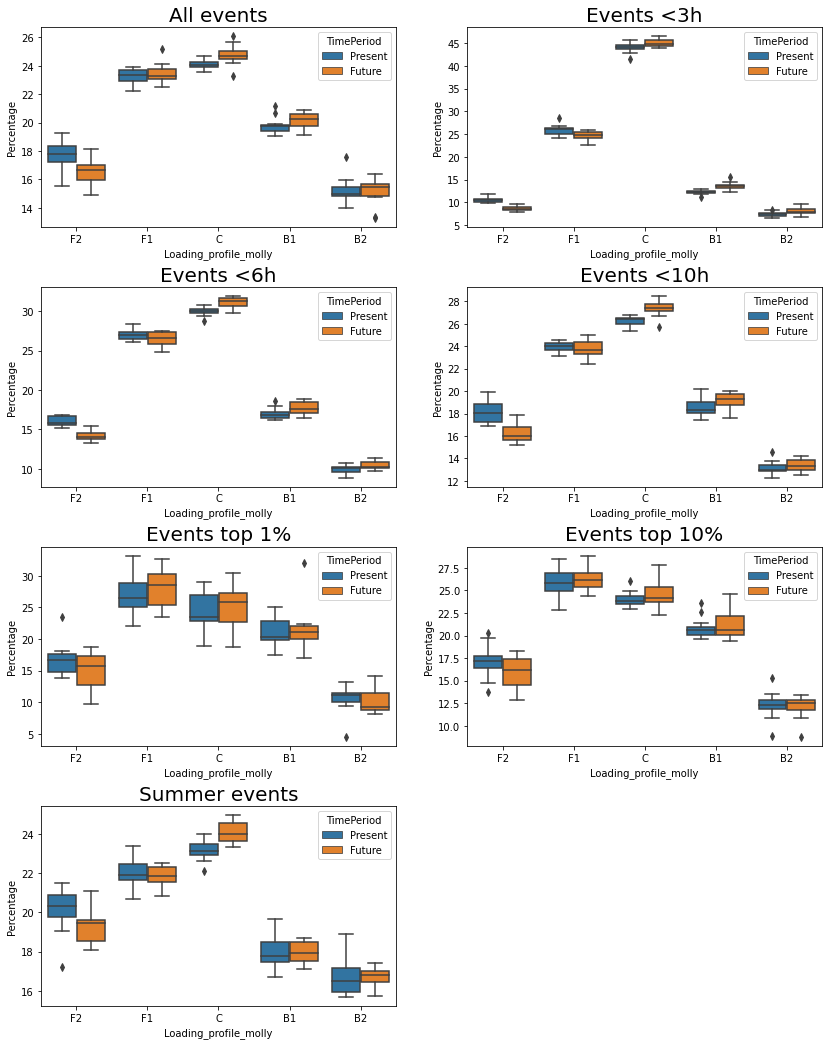

In [38]:
def plot_loading_profile_boxplot(axs, df, title):
    sns.boxplot(ax=axs,data=df, x='Loading_profile_molly', y='Percentage', hue='TimePeriod',
                order=['F2', 'F1', 'C', 'B1', 'B2'])
    axs.set_title(title, fontsize=20)

fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(14, 18))
fig.subplots_adjust(hspace=0.3)    
plot_loading_profile_boxplot(axs[0,0], combined_df_loading, 'All events')    
plot_loading_profile_boxplot(axs[0,1], combined_df_veryshortdurations_loading, 'Events <3h')        
plot_loading_profile_boxplot(axs[1,0], combined_df_shortdurations_loading, 'Events <6h')   
plot_loading_profile_boxplot(axs[1,1], combined_df_lessshortdurations_loading, 'Events <10h')   
plot_loading_profile_boxplot(axs[2,0], combined_df_loading_top1percent, 'Events top 1%') 
plot_loading_profile_boxplot(axs[2,1], combined_df_loading_top10percent, 'Events top 10%')   
plot_loading_profile_boxplot(axs[3,0], combined_df_loading_summer, 'Summer events')   
  
fig.delaxes(axs[3, 1])